In [1]:
from Peak_Search_Linien import ini_peak_search, mod_peak_search,zero_measure,fir_measure, fir_measure_new
from windfreak import SynthHD
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from linien_utils import get_waveform, set_scan_range
from linien_client.connection import LinienClient
from scipy.signal import find_peaks

import statistics
import time
import csv
c = LinienClient(
    host="10.10.222.32",
    user="root",
    password="root"
)
c.connect(autostart_server=True, use_parameter_cache=True)

linien_client.connection       INFO     Try to connect to 10.10.222.32:18862
linien_client.connection       INFO     Connection established!


In [6]:
x,y=(1,2)

In [10]:
type(x)


int

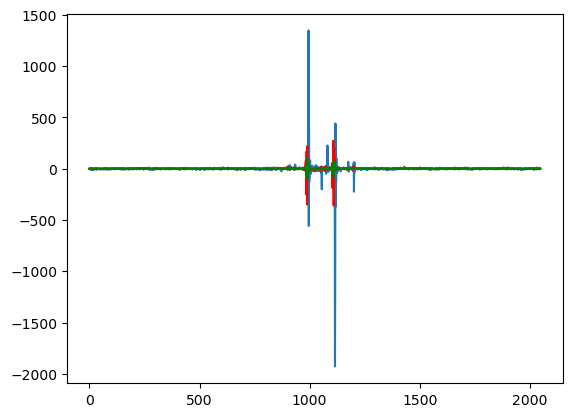

In [14]:
w = get_waveform(c)
plt.plot(w)
avg=20
w_avg = w/avg
for _ in range(avg):
    time.sleep(0.2)
    w_avg = w_avg + get_waveform(c)/avg
plt.plot(w_avg, color='red')

w2_avg = w_avg*20/80
for _ in range(avg):
    time.sleep(0.2)
    w2_avg = w2_avg + get_waveform(c)/80
plt.plot(w2_avg, color='green')

In [6]:
from dataclasses import dataclass
from experimental_control.devices.device import Device, DeviceConfig
from experimental_control.devices.device_client import connect_client_device
from rpyc import Service
import numpy as np
from pandas import read_csv
from scipy.signal import savgol_filter
import logging
from scipy.signal import savgol_filter as sf
import numpy as np
import matplotlib.pyplot  as plt
from scipy.signal import find_peaks

In [3]:

import pickle
with open(f'2024_3_28_NLTL3_powerscan_10MHzstep_fir_amp_all-0.pickle', 'rb') as handle:
    fir_amp_all_0=pickle.load(handle)
with open(f'2024_3_28_NLTL3_powerscan_10MHzstep_fir_amp_all-1.pickle', 'rb') as handle:
    fir_amp_all_1=pickle.load(handle)
with open(f'2024_3_28_NLTL3_powerscan_10MHzstep_fir_amp_all-2.pickle', 'rb') as handle:
    fir_amp_all_2=pickle.load(handle)
with open(f'2024_3_28_NLTL3_powerscan_10MHzstep_fir_amp_all-4.pickle', 'rb') as handle:
    fir_amp_all_4=pickle.load(handle)
with open(f'2024_3_28_NLTL3_powerscan_10MHzstep_fir_amp_all-5.pickle', 'rb') as handle:
    fir_amp_all_5=pickle.load(handle)


In [6]:

power_scan = np.linspace(-20, 10, 100)
wrong_data_idx_all = [[],[],[],[],[]]
fir_amp_all_all_processed = [[],[],[],[],[]]
fir_amp_all_all = [fir_amp_all_0, fir_amp_all_1, fir_amp_all_2, fir_amp_all_4, fir_amp_all_5]
for j in range(0,5):
    for i in range(0, 100):
        fir_amp_1 = fir_amp_all_all[j][i]
        fir_amp_1 = sf(fir_amp_1, 10, 3)
        if fir_amp_1[0] > 1000:
            # print(f"{j}-{i} have the wrong data")
            wrong_data_idx_all[j].append(i)
        else:
            fir_amp_all_all_processed[j].append((fir_amp_1 + fir_amp_1)/2.0)
    # plt.plot(power_scan,fir_amp,label = "first order")
    # # plt.plot(power_scan,sf(fir_amp_all_1[i], 30, 3),label = "first order")

    # posi, _ = find_peaks(fir_amp, prominence=50)
    # plt.scatter(power_scan[posi], fir_amp[posi])

    # #plt.plot(power_scan,zero_amp_all[i],label = "zero order")
    # plt.xlabel("Power / dBm")
    # plt.ylabel("peak amp (a.u.)")


Text(0.5, 1.0, 'NLTL3')

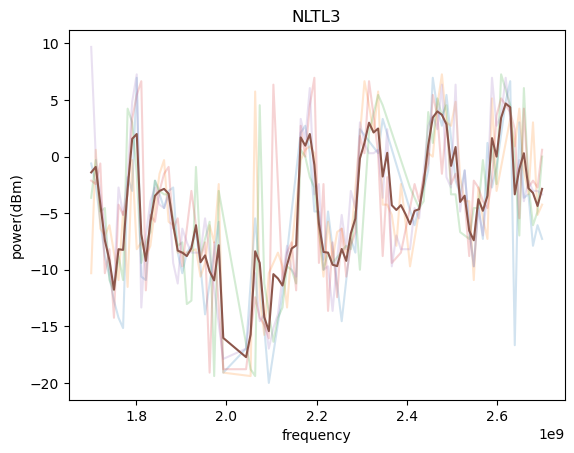

In [15]:
pow_max_all_all = [[],[],[],[],[]]
power_scan = np.linspace(-20, 10, 100)
fre_scan_all = [np.linspace(1700e6,2700e6,100),np.linspace(1700e6,2700e6,100),np.linspace(1700e6,2700e6,100),np.linspace(1700e6,2700e6,100),np.linspace(1700e6,2700e6,100)]
for j in range(0,5):
    pow_max_all = []
    fre_scan_all[j] = np.delete(fre_scan_all[j], wrong_data_idx_all[j])

    for i in range(0, len(fir_amp_all_all_processed[j])):
        fir_amp = fir_amp_all_all_processed[j][i]
        # fir_amp = sf(fir_amp, 30, 3)
        posi, _ = find_peaks(fir_amp, prominence=30)
        if len(posi) == 1:
            posi = posi[0]
        elif len(posi) > 1:
            fir_amp_max_index = posi[0]
            fir_amp_max_amp = fir_amp[posi[0]]
            for k in range(0, len(posi)):
                if posi[k] < 10 or posi[k] > 90:
                    continue
                if fir_amp[posi[k]] > fir_amp_max_amp:
                    # print(f"i={i}, yes")
                    fir_amp_max_index = posi[k]
                    fir_amp_max_amp = fir_amp[posi[k]]
            posi = fir_amp_max_index
        else:
            posi = np.where(fir_amp==np.max(fir_amp))
            posi = posi[0]
            posi = posi[0]
        # print(posi)
        # if power_scan[posi] < -15:
        #     print(f"i={i} posi={posi}")
        pow_max_all_all[j].append( power_scan[posi]    )
    plt.plot(fre_scan_all[j],pow_max_all_all[j], alpha=0.2)
x = np.linspace(1.7e9, 2.7e9, 100)
y = 0
for j in range(0,5):
    y = y + np.interp(x, fre_scan_all[j],pow_max_all_all[j])/5
plt.plot(x,y)
# plt.plot(x, sf(y, 5, 2))
plt.xlabel("frequency")
plt.ylabel("power(dBm)")
plt.title('NLTL3')

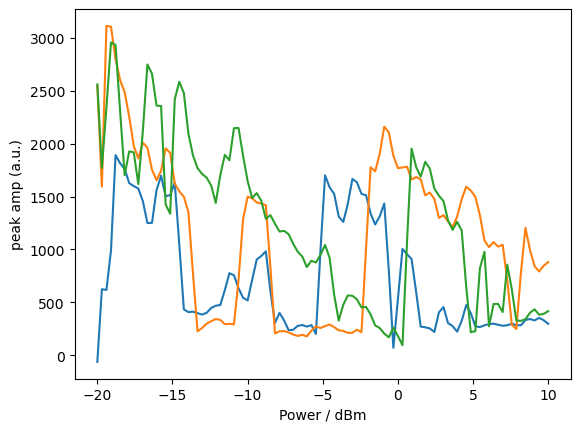

In [22]:
from scipy.signal import savgol_filter as sf

for i in range(29, 32):
    plt.plot(power_scan,sf(fir_amp_all_5[i],2,1),label = "first order")
    #plt.plot(power_scan,zero_amp_all[i],label = "zero order")
    plt.xlabel("Power / dBm")
    plt.ylabel("peak amp (a.u.)")


In [132]:
len(fir_amp_all_all_processed[1])

84

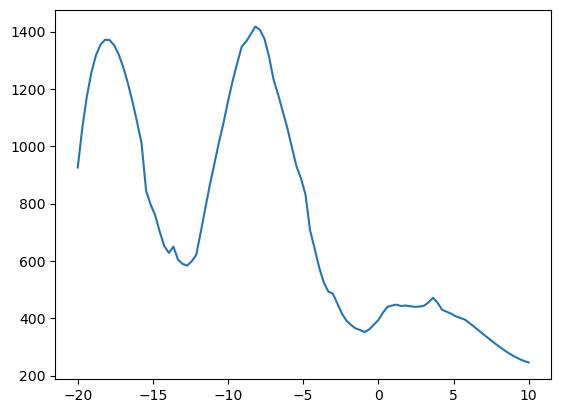

In [100]:
plt.plot(power_scan, fir_amp_all[21])

In [96]:
import pickle
with open(f'2024_3_29_NLTL3_powerscan_5MHzstep_fir_amp_all-0.pickle', 'rb') as handle:
    fir_amp_all_5Mhz_0=pickle.load(handle)
with open(f'2024_3_29_NLTL3_powerscan_5MHzstep_fir_amp_all-1.pickle', 'rb') as handle:
    fir_amp_all_5Mhz_1=pickle.load(handle)
with open(f'2024_3_29_NLTL3_powerscan_5MHzstep_fir_amp_all-2.pickle', 'rb') as handle:
    fir_amp_all_5Mhz_2=pickle.load(handle)
with open(f'2024_3_29_NLTL3_powerscan_5MHzstep_fir_amp_all-3.pickle', 'rb') as handle: # this file only has 79 scans
    fir_amp_all_5Mhz_3=pickle.load(handle)

Text(0.5, 1.0, 'NLTL3')

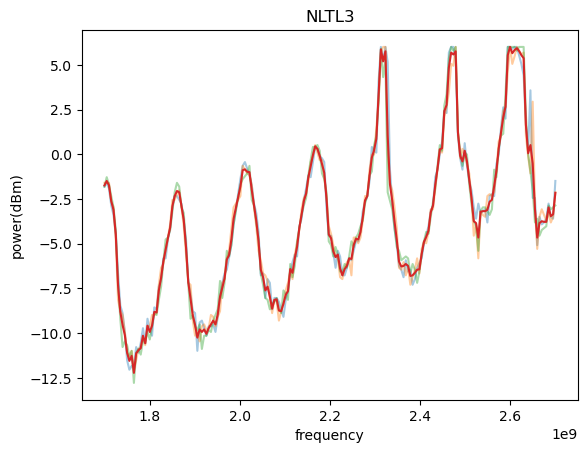

In [99]:
pow_max_all_all = [[],[],[]]
power_scan = np.linspace(-15, 6, 200)
fir_amp_all_all = [fir_amp_all_5Mhz_0, fir_amp_all_5Mhz_1, fir_amp_all_5Mhz_2]
fre_scan = np.linspace(1700e6,2700e6,200)
fre_scan = np.delete(fre_scan,np.where(np.logical_and(fre_scan<2000e6 , fre_scan>=1987e6))) # could not resolve
fre_scan_all = [fre_scan, fre_scan, fre_scan]
for j in range(0,3):
    pow_max_all = []
    for i in range(0, len(fir_amp_all_all[j])):
        fir_amp = fir_amp_all_all[j][i]
        fir_amp = sf(fir_amp, 15, 3)
        posi = np.where(fir_amp==np.max(fir_amp))
        posi = posi[0]
        posi = posi[0]
        if posi == 0 or np.max(fir_amp)<1000: # found the zeroth order peak
            fre_scan_all[j] = np.delete(fre_scan_all[j], i)
            continue  
        pow_max_all_all[j].append( power_scan[posi])
    plt.plot(fre_scan_all[j],pow_max_all_all[j], alpha=0.4)
x = np.linspace(1.7e9, 2.7e9, 200)
y = 0
for j in range(0,3):
    y = y + np.interp(x, fre_scan_all[j],pow_max_all_all[j])/3
plt.plot(x,y)
# plt.plot(x, sf(y, 20, 3))
plt.xlabel("frequency")
plt.ylabel("power(dBm)")
plt.title('NLTL3')

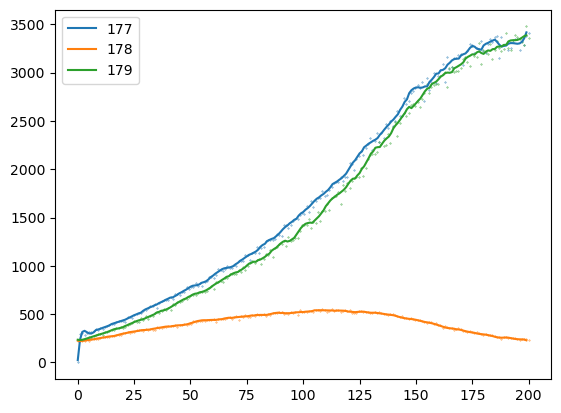

In [100]:
p=[]
hp=[]
for i in range(177,180):
    plt.plot(sf(fir_amp_all_5Mhz_0[i], 15, 5), label=f"{i}")
    plt.scatter(np.linspace(0,200,200),fir_amp_all_5Mhz_0[i],s=0.1)
    # h0 = max(sf(fir_amp_all_5Mhz_0[i], 15, 5))
    # p0=np.where(sf(fir_amp_all_5Mhz_0[i], 15, 5)==h0)[0]
    # hp.append(h0)
    # p.append(p0)
# plt.plot(p, hp)
# plt.scatter(p, hp)
plt.legend()

In [86]:
import csv
scan_data = ([x[i], y[i]] for i in range(0,200))
with open("2024_4_1_NLTL3_powerscan_5MHzstep.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow([ "frequency [Hz]", "input_power [dBm]"])
    for row in scan_data:
        writer.writerow(row)

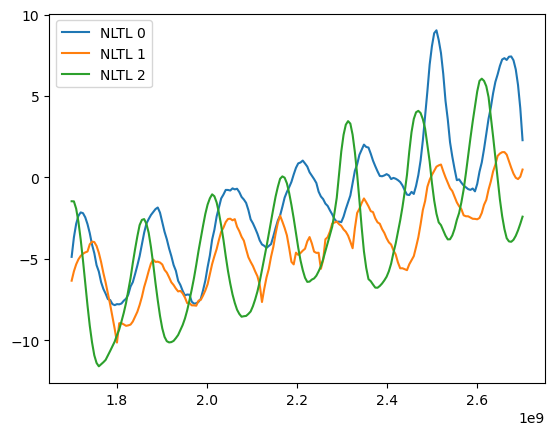

In [101]:
from pandas import read_csv
for channel in range(0,3):
    if channel == 0:
        nltl_data_file = "2024_2_7_NLTL_powerscan_5MHzstep.csv"
    elif channel == 1:
        nltl_data_file = "2024_2_15_NLTL2_powerscan_5MHzstep.csv"
    else:
        nltl_data_file = "2024_4_1_NLTL3_powerscan_5MHzstep.csv"
    data = read_csv(nltl_data_file)
    frequency_data = data['frequency [Hz]']
    power_data = data['input_power [dBm]']                
    filtered_power_data = savgol_filter(power_data, 15, 3)
    plt.plot(frequency_data, filtered_power_data, label=f"NLTL {channel}")
plt.legend()